## Zadanie
1. Wczytaj zbiór danych w pliku `boston.csv` ([opis](https://www.rdocumentation.org/packages/MASS/versions/7.3-58.3/topics/Boston)), a następnie modeluj zależność `medv` od pozostałych zmiennych.
    - Dokonaj manualnej selekcji modelu. Porównaj 4-5 modeli z jedną lub wieloma zmiennymi.
    - Przeprowadź diagnostykę modeli.
        - W `summary()` zwróć uwagę m.in. na $R^2$ oraz współczynniki i ich p-wartości.
        - Stwórz wykresy rezyduów.
    - Zanotuj obserwacje.

In [1]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./data/boston.csv")
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


<Axes: >

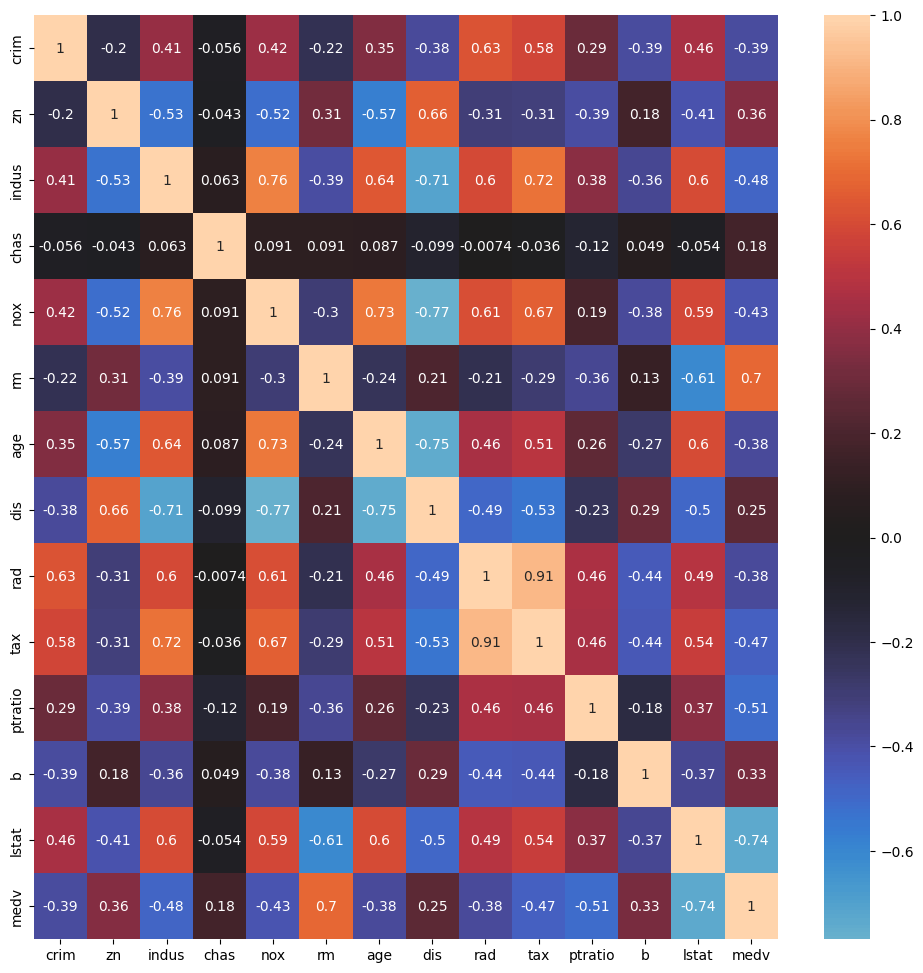

In [3]:
import seaborn as sns
df = pd.read_csv("./data/boston.csv")
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(df.corr(), annot=True, center=0.0, ax=ax)

In [ ]:
# Medv - median value of owner-occupied homes in $1000s.
# lstat - lower status of the population (percent).
# Corelation between lstat and medv is -0.74
y = df.medv
X = sm.add_constant(df.lstat)

print(X.head())
print()
print(y.head())

   const  lstat
0    1.0   4.98
1    1.0   9.14
2    1.0   4.03
3    1.0   2.94
4    1.0   5.33

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: medv, dtype: float64


In [5]:
lm = sm.OLS(y, X)
lm_fit = lm.fit()

In [6]:
lm_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Wed, 16 Apr 2025   Prob (F-statistic):           5.08e-88
Time:                        23:36:16   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.5538      0.563     61.415      0.000      33.448      35.659
lstat         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0, 0.5, 'Residual')

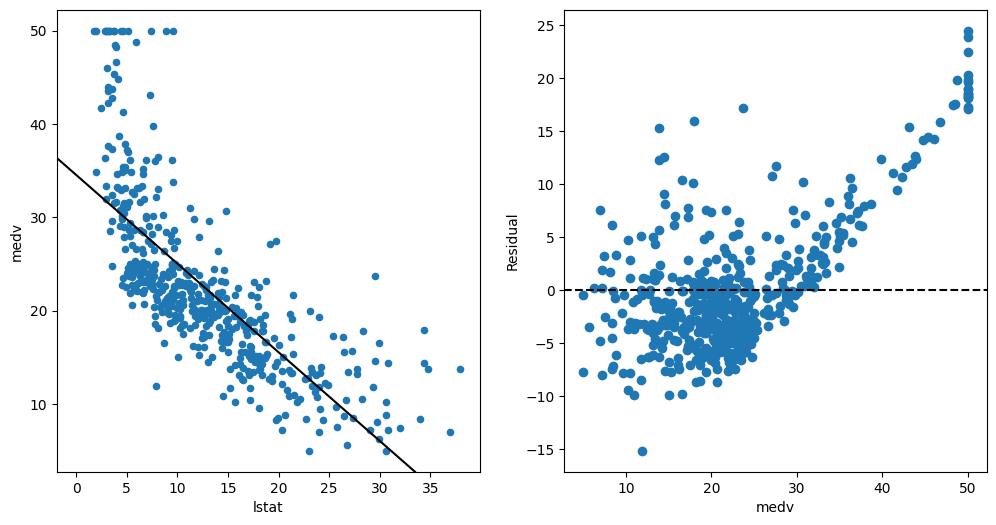

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

df.plot(kind='scatter', y='medv', x='lstat', ax=ax1)
(b0, b1) = lm_fit.params

ax1.axline(xy1=(0,b0), slope=b1, color='k')

ax2.scatter(df.medv, lm_fit.resid)
ax2.axhline(0, linestyle='--', color='k')
ax2.set_xlabel('medv')
ax2.set_ylabel('Residual')

### Wniosek
* R^2 = 0.544 - około 54.5% zmienności jest wyjaśniane przez zmienną lstat
* Zmienna lstat jest istotna statystycznie -> P>|t| = 0.000
* Każdy wzrost lstat o 1 jednostkę (1 punkt procentowy), wartość medv (mediana wartości domów) zmniejszy się o 0.95 jednostki ($950).

In [ ]:
# medv - median value of owner-occupied homes in $1000s.
# rm - average number of rooms per dwelling.
# Corelation between rm and medv is 0.7
y = df.medv
X = sm.add_constant(df.rm)

print(X.head())
print()
print(y.head())

   const     rm
0    1.0  6.575
1    1.0  6.421
2    1.0  7.185
3    1.0  6.998
4    1.0  7.147

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: medv, dtype: float64


In [9]:
lm = sm.OLS(y, X)
lm_fit = lm.fit()

In [10]:
lm_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Wed, 16 Apr 2025   Prob (F-statistic):           2.49e-74
Time:                        23:36:16   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6706      2.650    -13.084      0.000     -39.877     -29.465
rm             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0, 0.5, 'Residual')

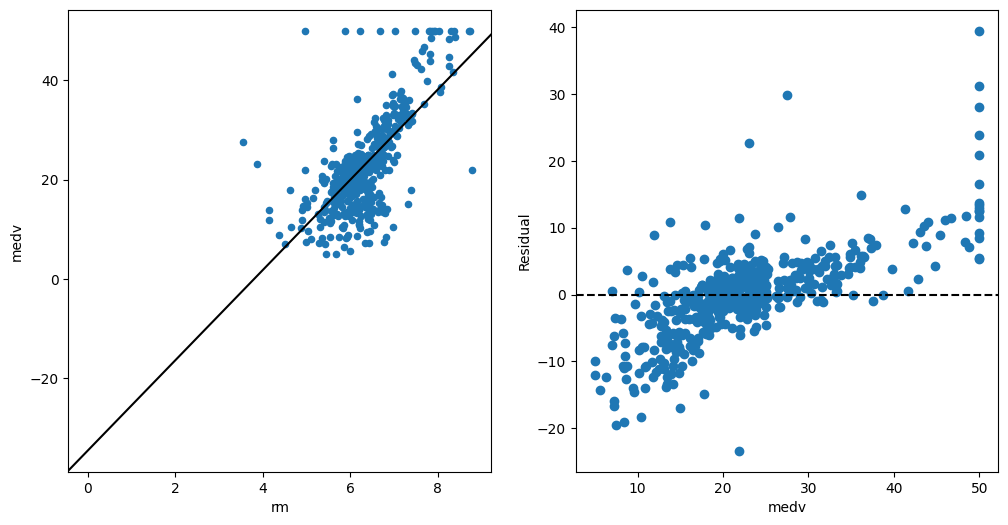

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

df.plot(kind='scatter', y='medv', x='rm', ax=ax1)
(b0, b1) = lm_fit.params

ax1.axline(xy1=(0,b0), slope=b1, color='k')

ax2.scatter(df.medv, lm_fit.resid)
ax2.axhline(0, linestyle='--', color='k')
ax2.set_xlabel('medv')
ax2.set_ylabel('Residual')

### Wniosek
* R^2 = 0.484 - około 48.4% zmienności jest wyjaśniane przez zmienną rm
* Zmienna rm jest istotna statystycznie -> P>|t| = 0.000
* Każdy wzrost rm o 1 jednostkę (1 dodatkowy pokój), wartość medv (mediana wartości domów) zwiększy się o 9.102 jednostki (9102$).

### Ważne
Nie powinno łączyć się ze sobą zmiennych które mają duże korelacje!

In [ ]:
# medv - median value of owner-occupied homes in $1000s.
# rm - average number of rooms per dwelling.
# crim  - per capita crime rate by town.
# Corelation between rm and medv is 0.7
# Corelation between crim and medv is -0.39

lm = smf.ols(formula="medv ~ rm + crim", data=df)
lm_fit = lm.fit()
lm_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     297.6
Date:                Wed, 16 Apr 2025   Prob (F-statistic):           5.22e-86
Time:                        23:36:16   Log-Likelihood:                -1642.7
No. Observations:                 506   AIC:                             3291.
Df Residuals:                     503   BIC:                             3304.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -29.2447      2.588    -11.300      0.000     -34.330     -24.160
rm             8.3911      0.405     20.726      0.000       7.596       9.186
crim          -0.2649      0.033     -8.011      0.000      -0.330      -0.200
==============================================================================
Omnibus:                      172.412   Durbin-Watson:                   0.807
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1047.536
Skew:                           1.349   Prob(JB):                    3.39e-228
Kurtosis:                       9.512   Cond. No.                         92.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

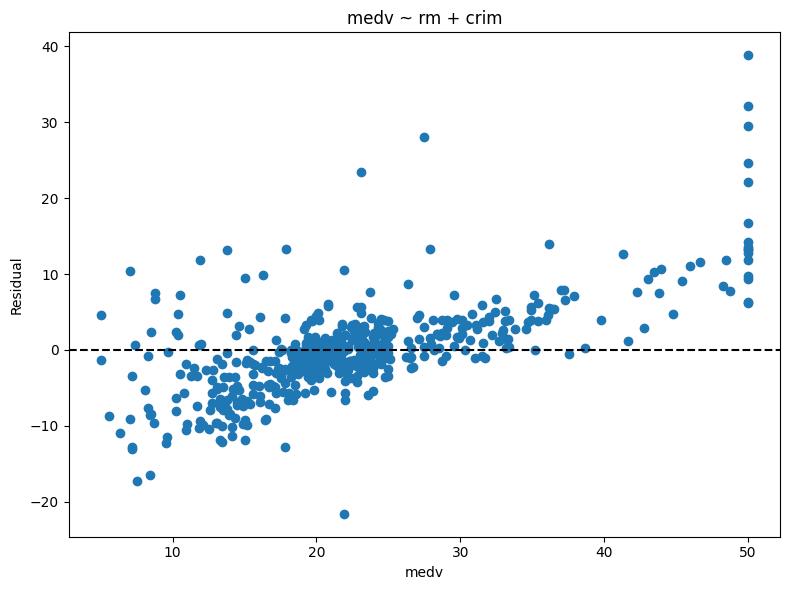

In [19]:
# Definicja modelu
X = sm.add_constant(df[['rm', 'crim']])
y = df.medv

# Dopasowanie modelu
lm_multiple = sm.OLS(y, X)
lm_multiple_fit = lm_multiple.fit()

# Tylko wykres reszt
plt.figure(figsize=(8, 6))
plt.scatter(df.medv, lm_multiple_fit.resid)
plt.axhline(0, linestyle='--', color='k')
plt.xlabel('medv')
plt.ylabel('Residual')
plt.title('medv ~ rm + crim')
plt.tight_layout()
plt.show()

### Wniosek
* R^2 = 0.542 - około 54.2% zmienności jest wyjaśniane przez kombinacje zmiennych rm + crim
* Zmienne rm i crim są istotne statystycznie -> P>|t| = 0.000
* Każdy wzrost rm o 1 jednostkę (1 dodatkowy pokój), wartość medv (mediana wartości domów) zwiększy się o 8.391 jednostki (8391$).
* Każdy wzrost crim o 1 jednostkę (wskaźnika przestępczości), wartość medv zmniejszy się o 0.265 jednostki (265$).

In [ ]:
# medv - median value of owner-occupied homes in $1000s.
# lstat - lower status of the population (percent).
# ptratio - pupil-teacher ratio by town.
# Corelation between lstat and medv is -0.74
# Corelation between ptratio and medv is -0.51

lm = smf.ols(formula="medv ~ lstat + ptratio", data=df)
lm_fit = lm.fit()
lm_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     387.9
Date:                Wed, 16 Apr 2025   Prob (F-statistic):          1.22e-102
Time:                        23:36:16   Log-Likelihood:                -1604.2
No. Observations:                 506   AIC:                             3214.
Df Residuals:                     503   BIC:                             3227.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     54.0468      2.242     24.105      0.000      49.642      58.452
lstat         -0.8202      0.039    -21.120      0.000      -0.896      -0.744
ptratio       -1.1453      0.128     -8.941      0.000      -1.397      -0.894
==============================================================================
Omnibus:                      150.452   Durbin-Watson:                   0.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              403.510
Skew:                           1.462   Prob(JB):                     2.39e-88
Kurtosis:                       6.253   Cond. No.                         201.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

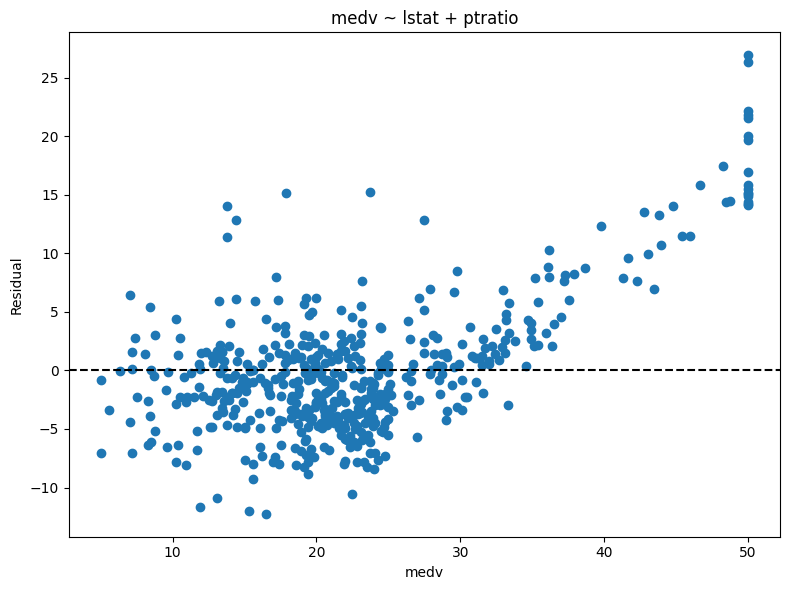

In [ ]:
# Definicja modelu
X = sm.add_constant(df[['lstat', 'ptratio']])
y = df.medv

# Dopasowanie modelu
lm_multiple = sm.OLS(y, X)
lm_multiple_fit = lm_multiple.fit()

# Tylko wykres reszt
plt.figure(figsize=(8, 6))
plt.scatter(df.medv, lm_multiple_fit.resid)
plt.axhline(0, linestyle='--', color='k')
plt.xlabel('medv')
plt.ylabel('Residual')
plt.title('medv ~ lstat + ptratio')
plt.tight_layout()
plt.show()

### Wniosek
* R^2 = 0.607 - około 60.7% zmienności jest wyjaśniane przez kombinacje zmiennych lstat + ptratio
* Zmienne lstat i ptratio są istotne statystycznie -> P>|t| = 0.000
* Każdy wzrost lstat o 1 jednostkę (1 punkt procentowy), wartość medv (mediana wartości domów) zmniejszy się o 0.82 jednostki ($820).
* Każdy wzrost ptratio o 1 jednostkę (wzrost o 1 w stosunku uczniów do nauczycieli), wartość medv zmniejszy się o 1.145 jednostki ($1145)

In [ ]:
# medv - median value of owner-occupied homes in $1000s.
# rm - average number of rooms per dwelling.
# crim  - per capita crime rate by town.
# ptratio - pupil-teacher ratio by town.
# Corelation between rm and medv is 0.7
# Corelation between crim and medv is -0.39
# Corelation between ptratio and medv is -0.51

lm = smf.ols(formula="medv ~ rm + crim + ptratio", data=df)
lm_fit = lm.fit()
lm_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     245.2
Date:                Wed, 16 Apr 2025   Prob (F-statistic):           6.15e-98
Time:                        23:36:17   Log-Likelihood:                -1612.0
No. Observations:                 506   AIC:                             3232.
Df Residuals:                     502   BIC:                             3249.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.3707      4.034     -0.836      0.404     -11.296       4.555
rm             7.3804      0.402     18.382      0.000       6.592       8.169
crim          -0.2050      0.032     -6.399      0.000      -0.268      -0.142
ptratio       -1.0695      0.133     -8.051      0.000      -1.331      -0.809
==============================================================================
Omnibus:                      234.656   Durbin-Watson:                   0.830
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2020.689
Skew:                           1.815   Prob(JB):                         0.00
Kurtosis:                      12.092   Cond. No.                         311.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

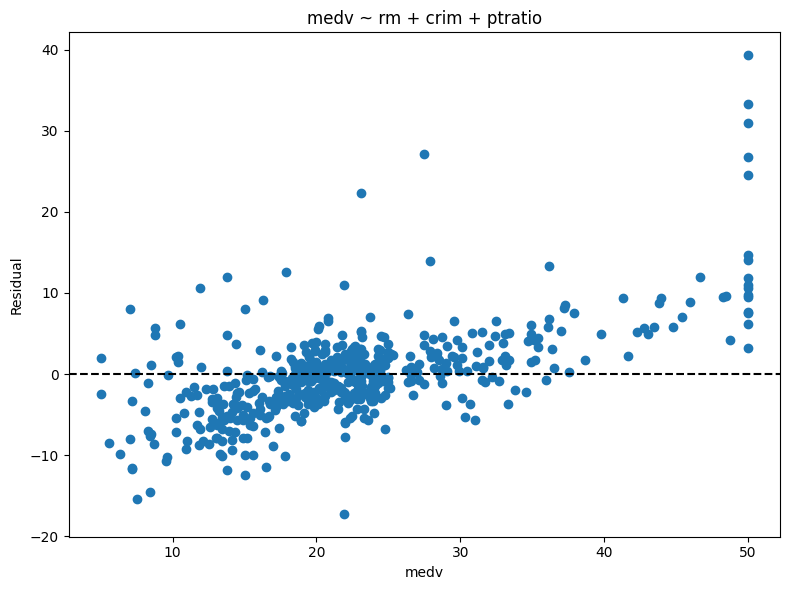

In [ ]:
# Definicja modelu
X = sm.add_constant(df[['rm', 'crim', 'ptratio']])
y = df.medv

# Dopasowanie modelu
lm_multiple = sm.OLS(y, X)
lm_multiple_fit = lm_multiple.fit()

# Tylko wykres reszt
plt.figure(figsize=(8, 6))
plt.scatter(df.medv, lm_multiple_fit.resid)
plt.axhline(0, linestyle='--', color='k')
plt.xlabel('medv')
plt.ylabel('Residual')
plt.title('medv ~ rm + crim + ptratio')
plt.tight_layout()
plt.show()

### Wniosek
* R^2 = 0.594 - około 59.4% zmienności jest wyjaśniane przez kombinacje zmiennych rm + crim + ptratio
* Zmienne rm, crim i ptratio są istotne statystycznie -> P>|t| = 0.000
* Każdy wzrost rm o 1 jednostkę (1 dodatkowy pokój), wartość medv (mediana wartości domów) zwiększy się o 7.380 jednostki (7380$).
* Każdy wzrost crim o 1 jednostkę (wskaźnika przestępczości), wartość medv zmniejszy się o 0.205 jednostki (205$).
* Każdy wzrost ptratio o 1 jednostkę (wzrost o 1 w stosunku uczniów do nauczycieli), wartość medv zmniejszy się o 1.069 ($1069)